## Binary Classification Example

In [1]:
import keras

Using TensorFlow backend.


In [2]:
keras.__version__

'2.2.0'

In [3]:
from keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [6]:
y_train[0]

5

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
y_train.shape

(60000,)

## Data Preparation

In [9]:
import numpy as np

In [10]:
from keras import backend as K

In [11]:
K.image_data_format()

'channels_last'

In [12]:
# input image dimensions
img_rows, img_cols = 28, 28

In [13]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

In [14]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [15]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [16]:
y_train = np.where(y_train != 5, 0, 1)
# not digit 5, then y target convert to 0
# if it is digit 5, then y targer is 1

In [17]:
y_train = np.asarray(y_train.astype('float32'))
y_test = np.asarray(y_test.astype('float32'))

In [18]:
y_train.shape

(60000,)

## Network Architecture

In [19]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

batch_size = 128
num_classes = 1
epochs = 20

In [20]:
model = Sequential()

In [21]:
model.add(Dense(128, 
                activation='relu',
                input_shape=input_shape))
model.add(Flatten())
model.add(Dense(num_classes, 
                activation='sigmoid'))

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 28, 28, 128)       256       
_________________________________________________________________
flatten_1 (Flatten)          (None, 100352)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 100353    
Total params: 100,609
Trainable params: 100,609
Non-trainable params: 0
_________________________________________________________________


## Loss Function and Optimisers

In [23]:
from keras import optimizers

In [24]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Measure the Performance of the NN

In [25]:
x_val = x_train[50000:]
x_train_1 = x_train[:50000]

In [26]:
y_val = y_train[50000:]
y_train_1 = y_train[:50000]

In [27]:
history = model.fit(x_train_1,
                    y_train_1,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 15s 298us/step - loss: 0.2532 - acc: 0.9084 - val_loss: 0.2027 - val_acc: 0.9121
Epoch 2/20
50000/50000 [==============================] - 5s 94us/step - loss: 0.1793 - acc: 0.9270 - val_loss: 0.1589 - val_acc: 0.9408: 
Epoch 3/20
50000/50000 [==============================] - 5s 94us/step - loss: 0.1501 - acc: 0.9444 - val_loss: 0.1393 - val_acc: 0.9572
Epoch 4/20
50000/50000 [==============================] - 5s 94us/step - loss: 0.1351 - acc: 0.9522 - val_loss: 0.1275 - val_acc: 0.9579
Epoch 5/20
50000/50000 [==============================] - 5s 94us/step - loss: 0.1262 - acc: 0.9560 - val_loss: 0.1208 - val_acc: 0.9618
Epoch 6/20
50000/50000 [==============================] - 5s 94us/step - loss: 0.1204 - acc: 0.9591 - val_loss: 0.1164 - val_acc: 0.9638s
Epoch 7/20
50000/50000 [==============================] - 5s 94us/step - loss: 0.1164 - acc: 0.9609 - val_loss: 0.1134 - va

In [28]:
history_dict = history.history

In [29]:
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

## Visualisation Performance

In [30]:
import matplotlib.pyplot as plt

In [31]:
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

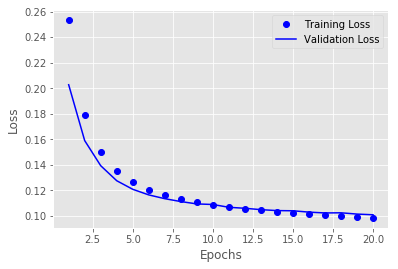

In [32]:
plt.style.use('ggplot')
plt.plot(epochs, loss_values, 'bo', 
         label='Training Loss')
plt.plot(epochs, val_loss_values, 'b',
         label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

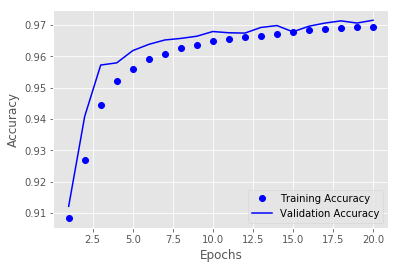

In [33]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', 
         label='Training Accuracy')
plt.plot(epochs, val_acc_values, 'b',
         label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend();

***